# MTH 337: Week 10

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Part A: One Star System

In [2]:
def dP_dt(P, t):
    G = 1.0
    M = 1.0
    x, y, vx, vy = P
    r3 = np.hypot(x, y)**3
    ax = -G*M*x/r3
    ay = -G*M*y/r3
    return np.array([vx, vy, ax, ay])

## Euler's Method

Let $$\frac{d\vec{P}}{dt} = f(\vec{P}, t)$$ 

Then

$$\vec{P}(t + h) = \vec{P}(t) + hf(\vec{P}, t)$$

The global error is O(h).

In [3]:
def euler_path(tmax, h, P0):
    steps = int(tmax/h)
    path = np.empty((steps+1, 4))
    P = np.copy(P0)
    path[0] = P
    for i in range(steps):
        P += h*dP_dt(P, i*h)
        path[i+1] = P
    return path

In [4]:
def plot_euler(tmax, h, P):
    path = euler_path(tmax, h, P)
    plt.plot(path[:,0], path[:,1])
    plt.axis('equal')
    plt.plot(0, 0, 'yo', ms=10)

## Heun's Method

$$\vec{P}(t + h) = \vec{P}(t) + \frac{1}{2}(F1 + F2)$$

where

$$\begin{cases}
F_1 &= hf(\vec{P}, t) \\
F_2 &= hf(\vec{P} + F_1, t + h)
\end{cases}$$

The global error is O(h<sup>2</sup>).

In [5]:
def heun_path(tmax, h, P0):
    steps = int(tmax/h)
    path = np.empty((steps+1, 4))
    P = np.copy(P0)
    path[0] = P
    for i in range(steps):
        F1 = h*dP_dt(P, i*h)
        F2 = h*dP_dt(P + F1, (i+1)*h)
        P += (F1 + F2)/2.
        path[i+1] = P
    return path

In [6]:
def plot_heun(tmax, h, P):
    path = heun_path(tmax, h, P)
    plt.plot(path[:,0], path[:,1])
    plt.axis('equal')
    plt.plot(0, 0, 'yo', ms=10)

## Fourth-Order Runge-Kutta Method

$$\vec{P}(t + h) = \vec{P}(t) + \frac{1}{6}(F_1 + 2F_2 + 2F_3 + F_4)$$

where

$$\begin{cases}
F_1 &= hf(\vec{P}, t) \\
F_2 &= hf(\vec{P} + \frac{1}{2}F_1, t + \frac{1}{2}h) \\
F_3 &= hf(\vec{P} + \frac{1}{2}F_2, t + \frac{1}{2}h) \\
F_4 &= hf(\vec{P} + F_3, t + h)
\end{cases}$$

The global error is O(h<sup>4</sup>).

In [7]:
def rk4_path(tmax, h, P0):
    steps = int(tmax/h)
    path = np.empty((steps+1, 4))
    P = np.copy(P0)
    path[0] = P
    for i in range(steps):
        F1 = h*dP_dt(P, i*h)
        F2 = h*dP_dt(P + F1/2, (i+0.5)*h)
        F3 = h*dP_dt(P + F2/2, (i+0.5)*h)
        F4 = h*dP_dt(P + F3, (i+1)*h)
        P += (F1 + 2*F2 + 2*F3 + F4)/6.
        path[i+1] = P
    return path

In [8]:
def plot_rk4(tmax, h, P0, standalone=True):
    path = rk4_path(tmax, h, P0)
    plt.plot(path[:,0], path[:,1])
    plt.axis('equal')
    plt.plot(0, 0, 'yo', ms=10)

### Comparing Heun's method with Fourth-Order Runge-Kutta

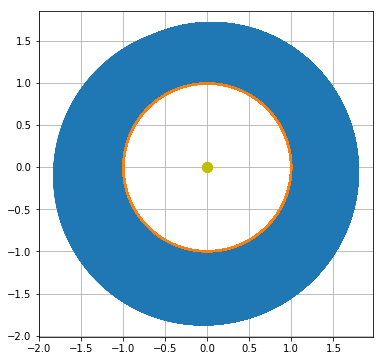

In [9]:
plt.figure(figsize=(6,6))
tmax = 10000
h = 0.1
P0 = np.array([1.,0.,0.,1.])
plot_heun(tmax, h, P0)
plot_rk4(tmax, h, P0)
plt.grid()

### Comparing Euler's method, Heun's method, and Fourth-Order Runge-Kutta

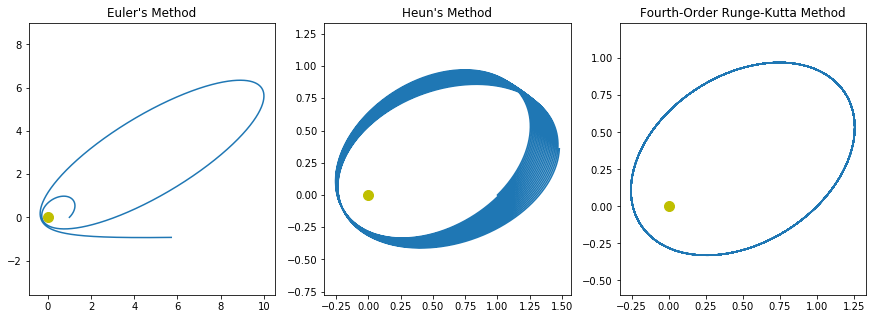

In [10]:
P0 = np.array([1., 0., 0.625, 0.625])
plt.figure(figsize=(15,5))
plt.subplot('131')
plot_euler(100, 0.01, P0)
plt.title("Euler's Method")
plt.subplot('132')
plot_heun(100, 0.01, P0)
plt.title("Heun's Method")
plt.subplot('133')
plot_rk4(100, 0.01, P0)
plt.title("Fourth-Order Runge-Kutta Method")

## Indexing with Integer Arrays

- An array of integers can be used as an index for another array.
- The integers in the index array are used to "look up" values in the other array.
- This is more flexible than slicing (and not restricted to a fixed step size).

In [11]:
a = np.arange(12)*10
print(a)

[  0  10  20  30  40  50  60  70  80  90 100 110]


a[[1, 4, 6]] &equiv; [a[1], a[4], a[6]]

In [12]:
b = np.array([1, 4, 6])
print(a[b])

[10 40 60]


### Values can be assigned to the indexed elements using the standard assignment operators

In [13]:
a[b] = 100
print(a)

[  0 100  20  30 100  50 100  70  80  90 100 110]


### The index arrays can be any shape - 2D, 3D etc.

In [14]:
c = np.array([[1, 3], [5, 6]])
print(c)

[[1 3]
 [5 6]]


In [15]:
print(a[c])

[[100  30]
 [ 50 100]]


## Animation Using Matplotlib

#### Turn off inline plots, and import the animation module

In [18]:
%matplotlib
from matplotlib import animation

Using matplotlib backend: Qt5Agg


### Animating the planet orbiting a single star

- Generate the path.
- Create the figure and objects to be drawn.
- Set the x and y limits.
- Define an **animate** function to redraw the objects.
- Call **animation.FuncAnimation** to run the animation

#### Generating an animation with just the planet

Note: If running this on a Mac:

- Remove the "blit=True" option in the last line.
- Set "interval=1" in the last line.

In [19]:
tmax = 20
h = 0.01
P0 = np.array([1., 0., 0., .5])
path = rk4_path(tmax, h, P0)

frames = int(tmax/h)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
planet, = plt.plot([], [], 'bo')
plt.plot(0, 0, 'yo', ms=8)

width = .25 + np.amax(np.abs(path[:,:2]))
plt.xlim(-width, width)
plt.ylim(-width, width)

def animate(frame, path, planet):
    x, y = path[frame, :2]
    planet.set_data(x, y)
    return planet,

animation.FuncAnimation(fig, animate, frames=frames, fargs=(path, planet), interval=0, blit=True, repeat=True)

#### Generating an animation with the planet and the orbit

In [20]:
tmax = 20
h = 0.01
P0 = np.array([1., 0., 0., .5])
path = rk4_path(tmax, h, P0)

frames = int(tmax/h)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.set_facecolor('k')
planet, = plt.plot([], [], 'bo')
orbit, = plt.plot([], [], 'cyan', lw=1)
plt.plot(0, 0, 'yo', ms=8)

width = .25 + np.amax(np.abs(path[:,:2]))
plt.xlim(-width, width)
plt.ylim(-width, width)

def animate(frame, path, planet, orbit):
    x, y = path[frame, :2]
    planet.set_data(x, y)
    orbit.set_data(path[:frame, 0], path[:frame, 1])
    return orbit, planet,

animation.FuncAnimation(fig, animate, frames=frames, fargs=(path, planet, orbit), interval=0, blit=True, repeat=True)